In [9]:
#Creamos librería C
"""
%%writefile convertirFloatAEntero.c
int convertirFloatAEntero(float numeroFloat) {
  int numeroEntero = (int)numeroFloat; // Convertir el número float a un entero
  return numeroEntero;
}
"""

'\n%%writefile convertirFloatAEntero.c\nint convertirFloatAEntero(float numeroFloat) {\n  int numeroEntero = (int)numeroFloat; // Convertir el número float a un entero\n  return numeroEntero;\n}\n'

In [10]:

#compilamos
"""
!gcc -c -fPIC convertirFloatAEntero.c -o convertirFloatAEntero.o
!gcc -shared -W -o libconvertirFloatAEntero.so ./convertirFloatAEntero.o
"""

'\n!gcc -c -fPIC convertirFloatAEntero.c -o convertirFloatAEntero.o\n!gcc -shared -W -o libconvertirFloatAEntero.so ./convertirFloatAEntero.o\n'

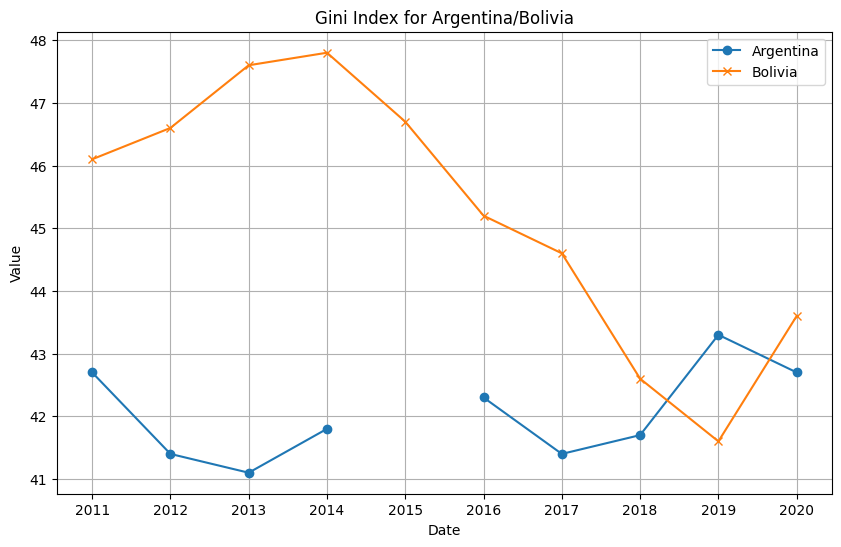

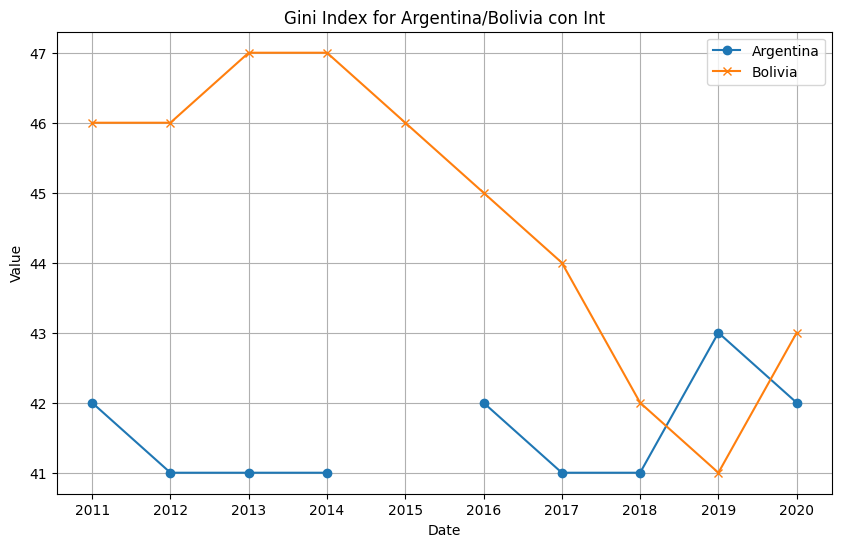

In [15]:
import requests
import json
import matplotlib.pyplot as plt
import datetime

"""
la respuesta de la API de la World Bank consiste en una lista de dos elementos:
el primer elemento es un objeto de metadatos y el segundo elemento es la lista de datos reales que estamos buscando.
Por lo tanto, data[1] accede a la lista de datos reales.
"""
def obtener_indice_gini(pais):
    url = "https://api.worldbank.org/v2/en/country/all/indicator/SI.POV.GINI?format=json&date=2011:2020&per_page=32500&page=1&country=%22Argentina%22"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        #print("Datos Obtenidos")
        # Verificamos si hay datos para Argentina
        if len(data) >= 1 and data[1]:

            # Filtramos los datos para Argentina. Crea una lista que contiene
            #solo los elementos de data[1] que corresponden a datos para Argentina

            # Filter data based on country name
            argentina_data = [d for d in data[1] if d["country"]["value"] == pais]
            # Extraer los valores de "date" y "value"
            dates = [d["date"] for d in argentina_data]
            values = [d["value"] for d in argentina_data]

            dates.reverse()
            values.reverse()

            # Extraemos los valores de los índices GINI
            indices_gini=[]
            indices_gini.append(dates)
            indices_gini.append(values)
            return indices_gini

        else:
            print("No hay datos disponibles para Argentina.")
            return None

    else:
        print("Error al obtener datos:", response.status_code)
        return None


# Importamos la librería ctypes
import ctypes
# Cargamos la libreria
libconvertirFloatAEntero = ctypes.CDLL('./libconvertirFloatAEntero.so')
# Definimos los tipos de los argumentos de la función factorial
libconvertirFloatAEntero.convertirFloatAEntero.argtypes = (ctypes.c_float,)
# Definimos el tipo del retorno de la función factorial
libconvertirFloatAEntero.convertirFloatAEntero.restype = ctypes.c_int
# Creamos nuestra función en Python
# hace de Wrapper para llamar a la función de C
def convertirFloatAEntero(num):
    return libconvertirFloatAEntero.convertirFloatAEntero(num)


if __name__ == "__main__":
    pais_uno="Argentina"
    pais_dos="Bolivia"
    indices_gini_argentina = obtener_indice_gini(pais_uno)
    indices_gini_otro = obtener_indice_gini(pais_dos)
    if indices_gini_argentina is not None:
        # Graficar los valores del índice GINI
        plt.figure(figsize=(10, 6))
        plt.plot(indices_gini_argentina[0], indices_gini_argentina[1], marker='o', label=pais_uno) #0 dates 1 values
        plt.plot(indices_gini_otro[0], indices_gini_otro[1], marker='x', label=pais_dos) #0 dates 1 values
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title('Gini Index for Argentina/'+pais_dos)
        plt.grid(True)
        plt.legend()
        plt.show()

        # Convert values to integers with C de argentina
        values_int_arg = []
        for i in range(len(indices_gini_argentina[1])):
          if indices_gini_argentina[1][i] is not None:
            #se llama a la función de C
            values_int_arg.append(convertirFloatAEntero(indices_gini_argentina[1][i]))
          else: values_int_arg.append(None)
        # Convert values to integers with C de otro
        values_int_otro = []
        for i in range(len(indices_gini_otro[1])):
          if indices_gini_otro[1][i] is not None:
            #se llama a la función de C
            values_int_otro.append(convertirFloatAEntero(indices_gini_otro[1][i]))
          else: values_int_otro.append(None)

        # Graficar los valores del índice GINI con enteros
        plt.figure(figsize=(10, 6))
        plt.plot(indices_gini_argentina[0], values_int_arg, marker='o', label=pais_uno) #0 dates 1 values
        plt.plot(indices_gini_otro[0], values_int_otro, marker='x', label=pais_dos) #0 dates 1 values
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.title('Gini Index for Argentina/'+pais_dos+' con Int')
        plt.grid(True)
        plt.legend()
        plt.show()
